<a href="https://colab.research.google.com/github/kvarun2300/Pizza-sales/blob/main/Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/sample_data/pizza_sales.csv")

In [ ]:
df.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [ ]:
df.shape

(48620, 12)

###KPI's

In [ ]:
total_revenue= df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_revenue/total_orders
avg_pizzas_per_order = total_pizzas_sold/ total_orders

print("Total Revenue: ${:.2f} ".format(total_revenue))
print("Total Pizzas sold:", total_pizzas_sold)
print("Total Orders:", total_orders)
print("Average order value:{:.2f}". format(avg_order_value))
print("Average Pizzas_per_order: {:.2f}".format (avg_pizzas_per_order))

Total Revenue: $817860.05 
Total Pizzas sold: 49574
Total Orders: 21350
Average order value:38.31
Average Pizzas_per_order: 2.32


#Charts

###Ingredient Analysis

In [ ]:
ingredient = (
                df['pizza_ingredients']
                .str.split(',')
                .explode()
                .str.strip()
                .value_counts()
                .reset_index()
                .rename(columns={'index': 'Count', 'pizza_ingredients': 'Ingredients'})
)
print(ingredient.head(10))

         Ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


###Daily Trend - Total Orders

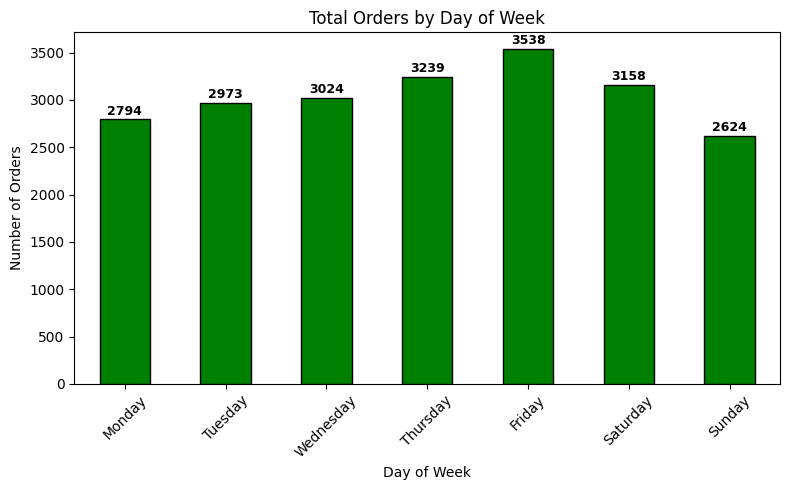

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories = weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed = False)['order_id'].nunique()

ax= orders_by_day.plot(kind = 'bar', figsize=(8,5), color='green', edgecolor='black')

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
  plt.text(i, val + 20, str(val), ha= 'center', va='bottom',fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

###Daily Trend - Total Revenue

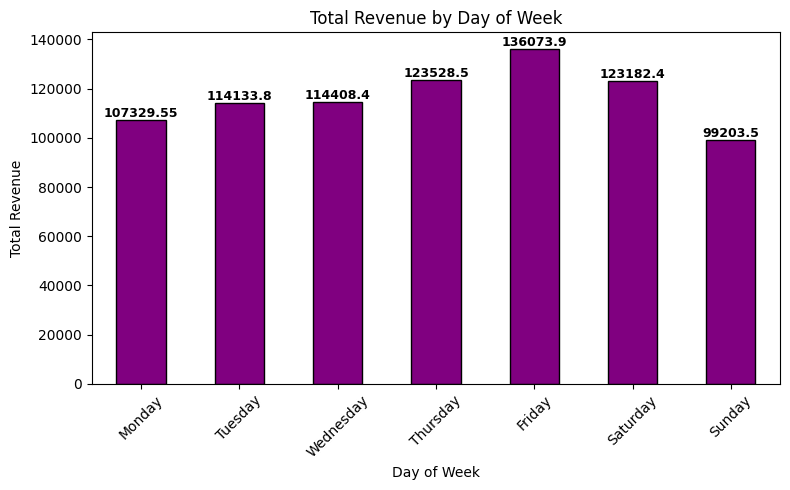

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df['day_name'] = pd.Categorical(df['day_name'], categories = weekday_order, ordered=True)

orders_by_day = df.groupby('day_name', observed = False)['total_price'].sum()

ax= orders_by_day.plot(kind = 'bar', figsize=(8,5), color='purple', edgecolor='black')

plt.title("Total Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
  plt.text(i, val + 20, str(val), ha= 'center', va='bottom',fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

###Hourly Trend - Total Orders

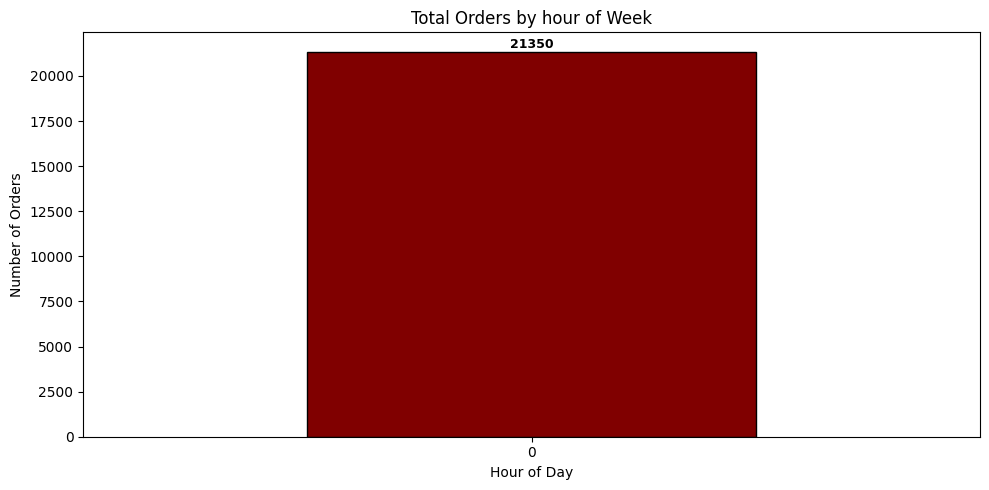

In [ ]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour', observed = False)['order_id'].nunique()

ax= orders_by_hour.plot(kind = 'bar', figsize=(10,5), color='maroon', edgecolor='black')

plt.title("Total Orders by hour of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_hour):
  plt.text(i, val + 5, str(val), ha= 'center', va='bottom',fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

###Monthly Trend - Total Revenue

/tmp/ipython-input-3103712533.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


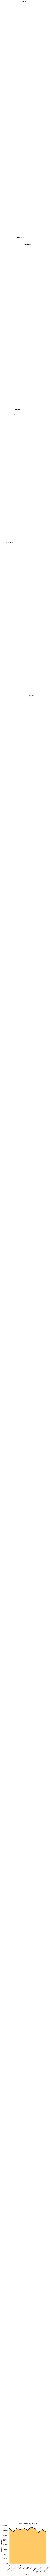

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January", "February","March","April","May","June","July","August","September","November","December"]

df['month_name'] = pd.Categorical(df['month_name'], categories = month_order, ordered=True)

orders_by_month = df.groupby('month_name', observed = False)['order_id'].nunique()

plt.figure(figsize=(5,5))
plt.fill_between(orders_by_month.index, orders_by_month.values,color="orange",alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values, color="black", linewidth=2,marker='o')

plt.title("Total Orders by month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
  plt.text(i, val + 20, str(val), ha= 'center', va='bottom',fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()